In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
missing_values = ["n/a", "na", "--", "-", " -  "]
df = pd.read_csv("nyc-rolling-sales.csv", na_values = missing_values, sep=',')

In [3]:
df.head(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,7/19/2017 0:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616.0,18690.0,1900,2,C7,NaN,12/14/2016 0:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212.0,7803.0,1900,2,C7,NaN,12/9/2016 0:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,9/23/2016 0:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,11/17/2016 0:00


In [4]:
df.isnull().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [5]:
df.dropna(how='any', inplace=True)
df.head(3)
df.shape

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,7/19/2017 0:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,9/23/2016 0:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,11/17/2016 0:00


(48244, 22)

In [6]:
#need to work this out
new= df['SALE DATE'].str.split('/')
df['SALE YEAR'] = new.str[3]
df.head(3)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE YEAR
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,0,5,1633.0,6440.0,1900,2,C2,6625000.0,7/19/2017 0:00,NaN
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,0,10,2272.0,6794.0,1913,2,C4,3936272.0,9/23/2016 0:00,NaN
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,0,6,2369.0,4615.0,1900,2,C2,8000000.0,11/17/2016 0:00,NaN


In [7]:
#need to work this out
df["SALE YEAR"] = pd.to_numeric(df["SALE YEAR"])
df['BUILDING AGE'] = df['SALE YEAR'] - df['YEAR BUILT']
df.head(10)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE YEAR,BUILDING AGE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,1633.0,6440.0,1900,2,C2,6625000.0,7/19/2017 0:00,NaN,NaN
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,2272.0,6794.0,1913,2,C4,3936272.0,9/23/2016 0:00,NaN,NaN
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,2369.0,4615.0,1900,2,C2,8000000.0,11/17/2016 0:00,NaN,NaN
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,...,8,1750.0,4226.0,1920,2,C4,3192840.0,9/23/2016 0:00,NaN,NaN
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,...,24,4489.0,18523.0,1920,2,D9,16232000.0,11/7/2016 0:00,NaN,NaN
11,15,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2B,400,21,,D1,530-532 EAST 5TH STREET,...,10,3717.0,12350.0,2009,2,D1,10350000.0,10/17/2016 0:00,NaN,NaN
22,26,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,376,14,,C6,244 EAST 7TH STREET,...,24,4131.0,16776.0,1928,2,C6,11900000.0,6/21/2017 0:00,NaN,NaN
172,176,1,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,391,19,,S3,624 EAST 9TH STREET,...,4,1520.0,3360.0,1910,2,S3,3300000.0,11/15/2016 0:00,NaN,NaN
173,177,1,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,393,4,,S4,165 AVENUE B,...,5,2201.0,5608.0,1900,2,S4,7215000.0,1/30/2017 0:00,NaN,NaN
174,178,1,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,394,5,,S5,183 AVENUE B,...,6,1779.0,3713.0,1910,2,S5,4750000.0,4/3/2017 0:00,NaN,NaN


In [8]:
df.drop('SALE DATE', axis=1, inplace=True)
df.drop('EASE-MENT', axis=1, inplace=True)
df.drop('TAX CLASS AT TIME OF SALE', axis=1, inplace=True)
df.drop('BUILDING CLASS AT TIME OF SALE', axis=1, inplace=True)
df.drop('APARTMENT NUMBER', axis=1, inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('ADDRESS', axis=1, inplace=True)
df.drop('YEAR BUILT', axis=1, inplace=True)
df.drop('SALE YEAR', axis=1, inplace=True)

df.head(5)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,BUILDING AGE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,10009,5,0,5,1633.0,6440.0,6625000.0,NaN
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10009,10,0,10,2272.0,6794.0,3936272.0,NaN
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,10009,6,0,6,2369.0,4615.0,8000000.0,NaN
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,10009,8,0,8,1750.0,4226.0,3192840.0,NaN
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,10009,24,0,24,4489.0,18523.0,16232000.0,NaN


In [124]:
#data looks pretty clean now we need to remove the "sales" that are title transfers
#mostly clean
#df.drop('BUILDING AGE', axis=1, inplace=True)
data = df[df['SALE PRICE'] > 100000]  

#maybe no properties being sold for under 100k this is NYC 
data.min()
data['SALE PRICE'].head(5)

import numpy as np
np.shape(data)

data_2=data[['BOROUGH','NEIGHBORHOOD','BUILDING CLASS AT PRESENT','TOTAL UNITS','LAND SQUARE FEET','GROSS SQUARE FEET']]

data_2.head(3)

#changing to categorical data
data_2['BUILDING CLASS AT PRESENT']=data_2['BUILDING CLASS AT PRESENT'].astype('category')
data_2['BUILDING CLASS AT PRESENT']=data_2['BUILDING CLASS AT PRESENT'].cat.codes


data_2['NEIGHBORHOOD']=data_2['NEIGHBORHOOD'].astype('category')
data_2['NEIGHBORHOOD']=data_2['NEIGHBORHOOD'].cat.codes

data_2.head(2)

data_3=data_2[['BOROUGH','TOTAL UNITS','LAND SQUARE FEET','GROSS SQUARE FEET']]

BOROUGH                                                                1
NEIGHBORHOOD                                          AIRPORT LA GUARDIA
BUILDING CLASS CATEGORY      01 ONE FAMILY DWELLINGS                    
TAX CLASS AT PRESENT                                                    
BLOCK                                                                  1
LOT                                                                    1
BUILDING CLASS AT PRESENT                                               
ZIP CODE                                                               0
RESIDENTIAL UNITS                                                      0
COMMERCIAL UNITS                                                       0
TOTAL UNITS                                                            0
LAND SQUARE FEET                                                       0
GROSS SQUARE FEET                                                      0
SALE PRICE                                         

0     6625000.0
3     3936272.0
4     8000000.0
6     3192840.0
9    16232000.0
Name: SALE PRICE, dtype: float64

(35955, 14)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS AT PRESENT,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET
0,1,ALPHABET CITY,C2,5,1633.0,6440.0
3,1,ALPHABET CITY,C4,10,2272.0,6794.0
4,1,ALPHABET CITY,C2,6,2369.0,4615.0


C:\Users\Calvin Lim\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Calvin Lim\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Calvin Lim\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/index

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS AT PRESENT,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET
0,1,1,16,5,1633.0,6440.0
3,1,1,18,10,2272.0,6794.0


In [67]:
#assigning x and y variables
list(data)
Y = data['SALE PRICE']
Y.head(3)
Y_2=Y

X = data_2
X.head(3)

X_2=data_3
X_2.head(3)

['BOROUGH',
 'NEIGHBORHOOD',
 'BUILDING CLASS CATEGORY',
 'TAX CLASS AT PRESENT',
 'BLOCK',
 'LOT',
 'BUILDING CLASS AT PRESENT',
 'ZIP CODE',
 'RESIDENTIAL UNITS',
 'COMMERCIAL UNITS',
 'TOTAL UNITS',
 'LAND SQUARE FEET',
 'GROSS SQUARE FEET',
 'SALE PRICE']

0    6625000.0
3    3936272.0
4    8000000.0
Name: SALE PRICE, dtype: float64

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS AT PRESENT,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET
0,1,1,16,5,1633.0,6440.0
3,1,1,18,10,2272.0,6794.0
4,1,1,16,6,2369.0,4615.0


,BOROUGH,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET
0,1,5,1633.0,6440.0
3,1,10,2272.0,6794.0
4,1,6,2369.0,4615.0


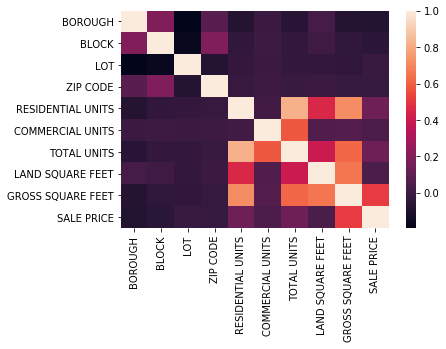

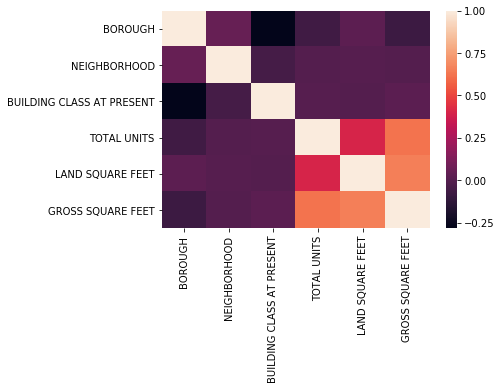

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

corr=data.corr()
sns.heatmap(corr)

plt.show()

corr2 = data_2.corr()
sns.heatmap(corr2)




In [141]:

#create model

from keras.layers import Dense
# create model
import keras
model = keras.Sequential()
model.add(Dense(10, input_dim=5, activation='relu' ))
model.add(Dense(6,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='linear'))



In [142]:
#compiling the model

from keras import losses


model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mean_absolute_error', 'mean_squared_error'])

In [86]:
#Splitting and Training the DATA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train ,X_test, Y_train , Y_test = train_test_split(X , Y , test_size = 0.2)

X_train.head(3)
X_2.head(2)

Y_train.head(3)

X_train2 ,X_test2, Y_train2 , Y_test2 = train_test_split(X_2 , Y_2 , test_size = 0.2)

scaler=StandardScaler().fit(X_train2)
x_scaled_train=scaler.transform(X_train2)
x_scaled_test = scaler.transform(X_test2)

Y_train.max()
Y_train.mean()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS AT PRESENT,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET
25054,2,238,10,2,3242.0,2520.0
73926,4,213,6,1,1440.0,1320.0
21144,2,152,10,2,5750.0,3274.0


,BOROUGH,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET
0,1,5,1633.0,6440.0
3,1,10,2272.0,6794.0


25054    461370.0
73926    345000.0
21144    755000.0
Name: SALE PRICE, dtype: float64

2210000000.0

1499965.7987220448

In [85]:
model.fit(x_scaled_train,Y_train2, epochs=6, batch_size=20)

Epoch 1/6
29735/29735 [==============================] - 7s 252us/step - loss: 246669400206744.9375 - mean_absolute_error: 1248576.1347 - mean_squared_error: 246669400206744.9375
Epoch 2/6
29735/29735 [==============================] - 5s 177us/step - loss: 241621339588981.6250 - mean_absolute_error: 1239668.6315 - mean_squared_error: 241621339588981.6250
Epoch 3/6
29735/29735 [==============================] - 5s 180us/step - loss: 239767487668024.2500 - mean_absolute_error: 1171837.6752 - mean_squared_error: 239767487668024.2500
Epoch 4/6
29735/29735 [==============================] - 5s 183us/step - loss: 235684013228657.3750 - mean_absolute_error: 1235716.4235 - mean_squared_error: 235684013228657.3750
Epoch 5/6
29735/29735 [==============================] - 5s 179us/step - loss: 231418309144594.5938 - mean_absolute_error: 1246002.5503 - mean_squared_error: 231418309144594.5938
Epoch 6/6
29735/29735 [==============================] - 6s 197us/step - loss: 227624382415506.4688 - mea

In [87]:
model.evaluate(x_scaled_test,Y_test2)

7434/7434 [==============================] - 1s 89us/step


[61211612397695.83, 1161124.1825733117, 61211612397695.83]

In [89]:
#comparison
from sklearn.linear_model import LinearRegression
model_multi = LinearRegression().fit(x_scaled_train,Y_train)
from sklearn.metrics import mean_squared_error
linear_test_prediction = model_multi.predict(x_scaled_test)
mean_squared_error(linear_test_prediction, Y_test)

92486767841119.11

In [126]:
#model has a large error due to different types of housing

#lets try to divide the data into seperate groups based on building type
data.head(3)

data['TAX CLASS AT PRESENT'].unique()

data['TAX CLASS AT PRESENT'].value_counts()

data=data[['BOROUGH','TAX CLASS AT PRESENT','TOTAL UNITS','LAND SQUARE FEET','GROSS SQUARE FEET','SALE PRICE']]

data_tax1=data[data['TAX CLASS AT PRESENT']=='1']

data_tax1.head(3)

data_tax2=data[data['TAX CLASS AT PRESENT']=='2']
data_tax2.head(3)


data_tax4=data[data['TAX CLASS AT PRESENT']=='4']
data_tax4.head(3)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,10009,5,0,5,1633.0,6440.0,6625000.0
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10009,10,0,10,2272.0,6794.0,3936272.0
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,10009,6,0,6,2369.0,4615.0,8000000.0


array(['2A', '2B', '2', '4', '1', '1A', '1B', '2C', ' ', '1C'],
      dtype=object)

1     24339
2      6422
4      1643
2A     1218
2C      975
1A      397
2B      392
        263
1B      192
1C      114
Name: TAX CLASS AT PRESENT, dtype: int64

,BOROUGH,TAX CLASS AT PRESENT,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
206,1,1,1,1975.0,3855.0,7425000.0
212,1,1,3,2150.0,4978.0,7750000.0
214,1,1,3,2469.0,3725.0,8300000.0


,BOROUGH,TAX CLASS AT PRESENT,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
9,1,2,24,4489.0,18523.0,16232000.0
22,1,2,24,4131.0,16776.0,11900000.0
219,1,2,24,2307.0,4500.0,7375000.0


,BOROUGH,TAX CLASS AT PRESENT,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
195,1,4,1,1218.0,3586.0,3700000.0
928,1,4,3,1360.0,4080.0,17300000.0
929,1,4,1,6468.0,14056.0,42400000.0


Text(0.5,1,'Tax Class 1')

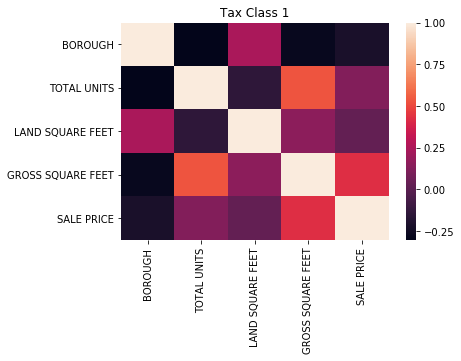

Text(0.5,1,'Tax Class 2')

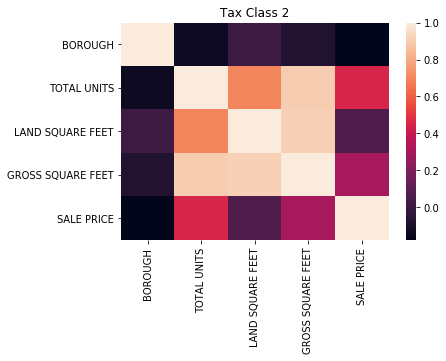

Text(0.5,1,'Tax Class 4')

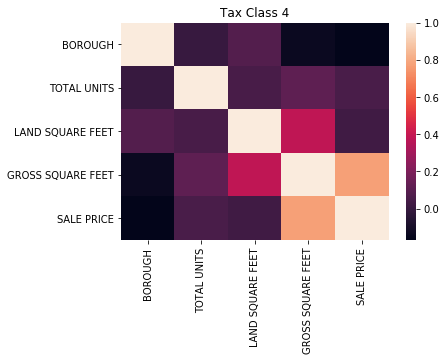

In [133]:
corr=data_tax1.corr()
#plt.title("Tax Class 1")
sns.heatmap(corr)
plt.title("Tax Class 1")

plt.show()

corr2 = data_tax2.corr()
plt.title("Tax Class 2")
sns.heatmap(corr2)

plt.show()

corr4=data_tax4.corr()
plt.title("Tax Class 4")
sns.heatmap(corr4)

In [136]:
#tax class 1
Y_tax1= data_tax1['SALE PRICE']

X_tax1=data_tax1[['BOROUGH','TAX CLASS AT PRESENT','TOTAL UNITS','LAND SQUARE FEET','GROSS SQUARE FEET']]


#tax class 2

Y_tax2=data_tax2['SALE PRICE']

X_tax2=data_tax2[['BOROUGH','TAX CLASS AT PRESENT','TOTAL UNITS','LAND SQUARE FEET','GROSS SQUARE FEET']]

#tax class 4 
Y_tax4=data_tax4['SALE PRICE']

X_tax4=data_tax4[['BOROUGH','TAX CLASS AT PRESENT','TOTAL UNITS','LAND SQUARE FEET','GROSS SQUARE FEET']]


In [137]:
#model building part 2
# need to split each sub group into training and splitting data

#class 1
X_train1 ,X_test1, Y_train1 , Y_test1 = train_test_split(X_tax1 , Y_tax1 , test_size = 0.2)

#class 2

X_train2 ,X_test2, Y_train2 , Y_test2 = train_test_split(X_tax2 , Y_tax2 , test_size = 0.2)


#class 4

X_train4 ,X_test4, Y_train4 , Y_test4 = train_test_split(X_tax4 , Y_tax4 , test_size = 0.2)

In [143]:
#class 1
model.fit(X_train1,Y_train1, epochs=100, batch_size=20)

Epoch 1/100
19471/19471 [==============================] - 4s 202us/step - loss: 1458997167845.3757 - mean_absolute_error: 693357.8907 - mean_squared_error: 1458997167845.3757
Epoch 2/100
19471/19471 [==============================] - 2s 122us/step - loss: 1015354140865.6403 - mean_absolute_error: 379488.2014 - mean_squared_error: 1015354140865.6403
Epoch 3/100
19471/19471 [==============================] - 2s 123us/step - loss: 961715863487.2079 - mean_absolute_error: 365628.3669 - mean_squared_error: 961715863487.2079
Epoch 4/100
19471/19471 [==============================] - 3s 133us/step - loss: 937884564153.0416 - mean_absolute_error: 362715.8628 - mean_squared_error: 937884564153.0416
Epoch 5/100
19471/19471 [==============================] - 2s 127us/step - loss: 917794277355.4895 - mean_absolute_error: 361059.3756 - mean_squared_error: 917794277355.4895
Epoch 6/100
19471/19471 [==============================] - 2s 121us/step - loss: 898344964277.1235 - mean_absolute_error: 3565

19471/19471 [==============================] - 2s 116us/step - loss: 721442638501.4777 - mean_absolute_error: 353063.4489 - mean_squared_error: 721442638501.4777
Epoch 48/100
19471/19471 [==============================] - 2s 114us/step - loss: 719778496231.7950 - mean_absolute_error: 349344.5911 - mean_squared_error: 719778496231.7950
Epoch 49/100
19471/19471 [==============================] - 2s 114us/step - loss: 716962023164.9365 - mean_absolute_error: 346223.9856 - mean_squared_error: 716962023164.9365
Epoch 50/100
19471/19471 [==============================] - 2s 112us/step - loss: 714839551271.5090 - mean_absolute_error: 350043.2152 - mean_squared_error: 714839551271.5090
Epoch 51/100
19471/19471 [==============================] - 2s 113us/step - loss: 712388751325.7106 - mean_absolute_error: 350319.1963 - mean_squared_error: 712388751325.7106
Epoch 52/100
19471/19471 [==============================] - 2s 114us/step - loss: 710506058269.6876 - mean_absolute_error: 348285.4775 - m

19471/19471 [==============================] - 3s 163us/step - loss: 667714351197.6121 - mean_absolute_error: 339250.0921 - mean_squared_error: 667714351197.6121
Epoch 94/100
19471/19471 [==============================] - 3s 140us/step - loss: 666680870200.2329 - mean_absolute_error: 337162.3134 - mean_squared_error: 666680870200.2329
Epoch 95/100
19471/19471 [==============================] - 2s 119us/step - loss: 666682266834.4167 - mean_absolute_error: 339123.4127 - mean_squared_error: 666682266834.4167
Epoch 96/100
19471/19471 [==============================] - 2s 94us/step - loss: 666385882428.7557 - mean_absolute_error: 338479.8351 - mean_squared_error: 666385882428.7557
Epoch 97/100
19471/19471 [==============================] - 2s 95us/step - loss: 666767825425.3813 - mean_absolute_error: 337743.8512 - mean_squared_error: 666767825425.3813
Epoch 98/100
19471/19471 [==============================] - 2s 108us/step - loss: 666037729443.3477 - mean_absolute_error: 337993.4815 - mea

4868/4868 [==============================] - 0s 27us/step


[501540027271.6779, 326474.22645336896, 501540027271.6779]

43500000.0

100700.0

771211.9276359715

<Figure size 2160x2160 with 0 Axes>

C:\Users\Calvin Lim\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Distribution of Price in Millions of Family Homes in New York')

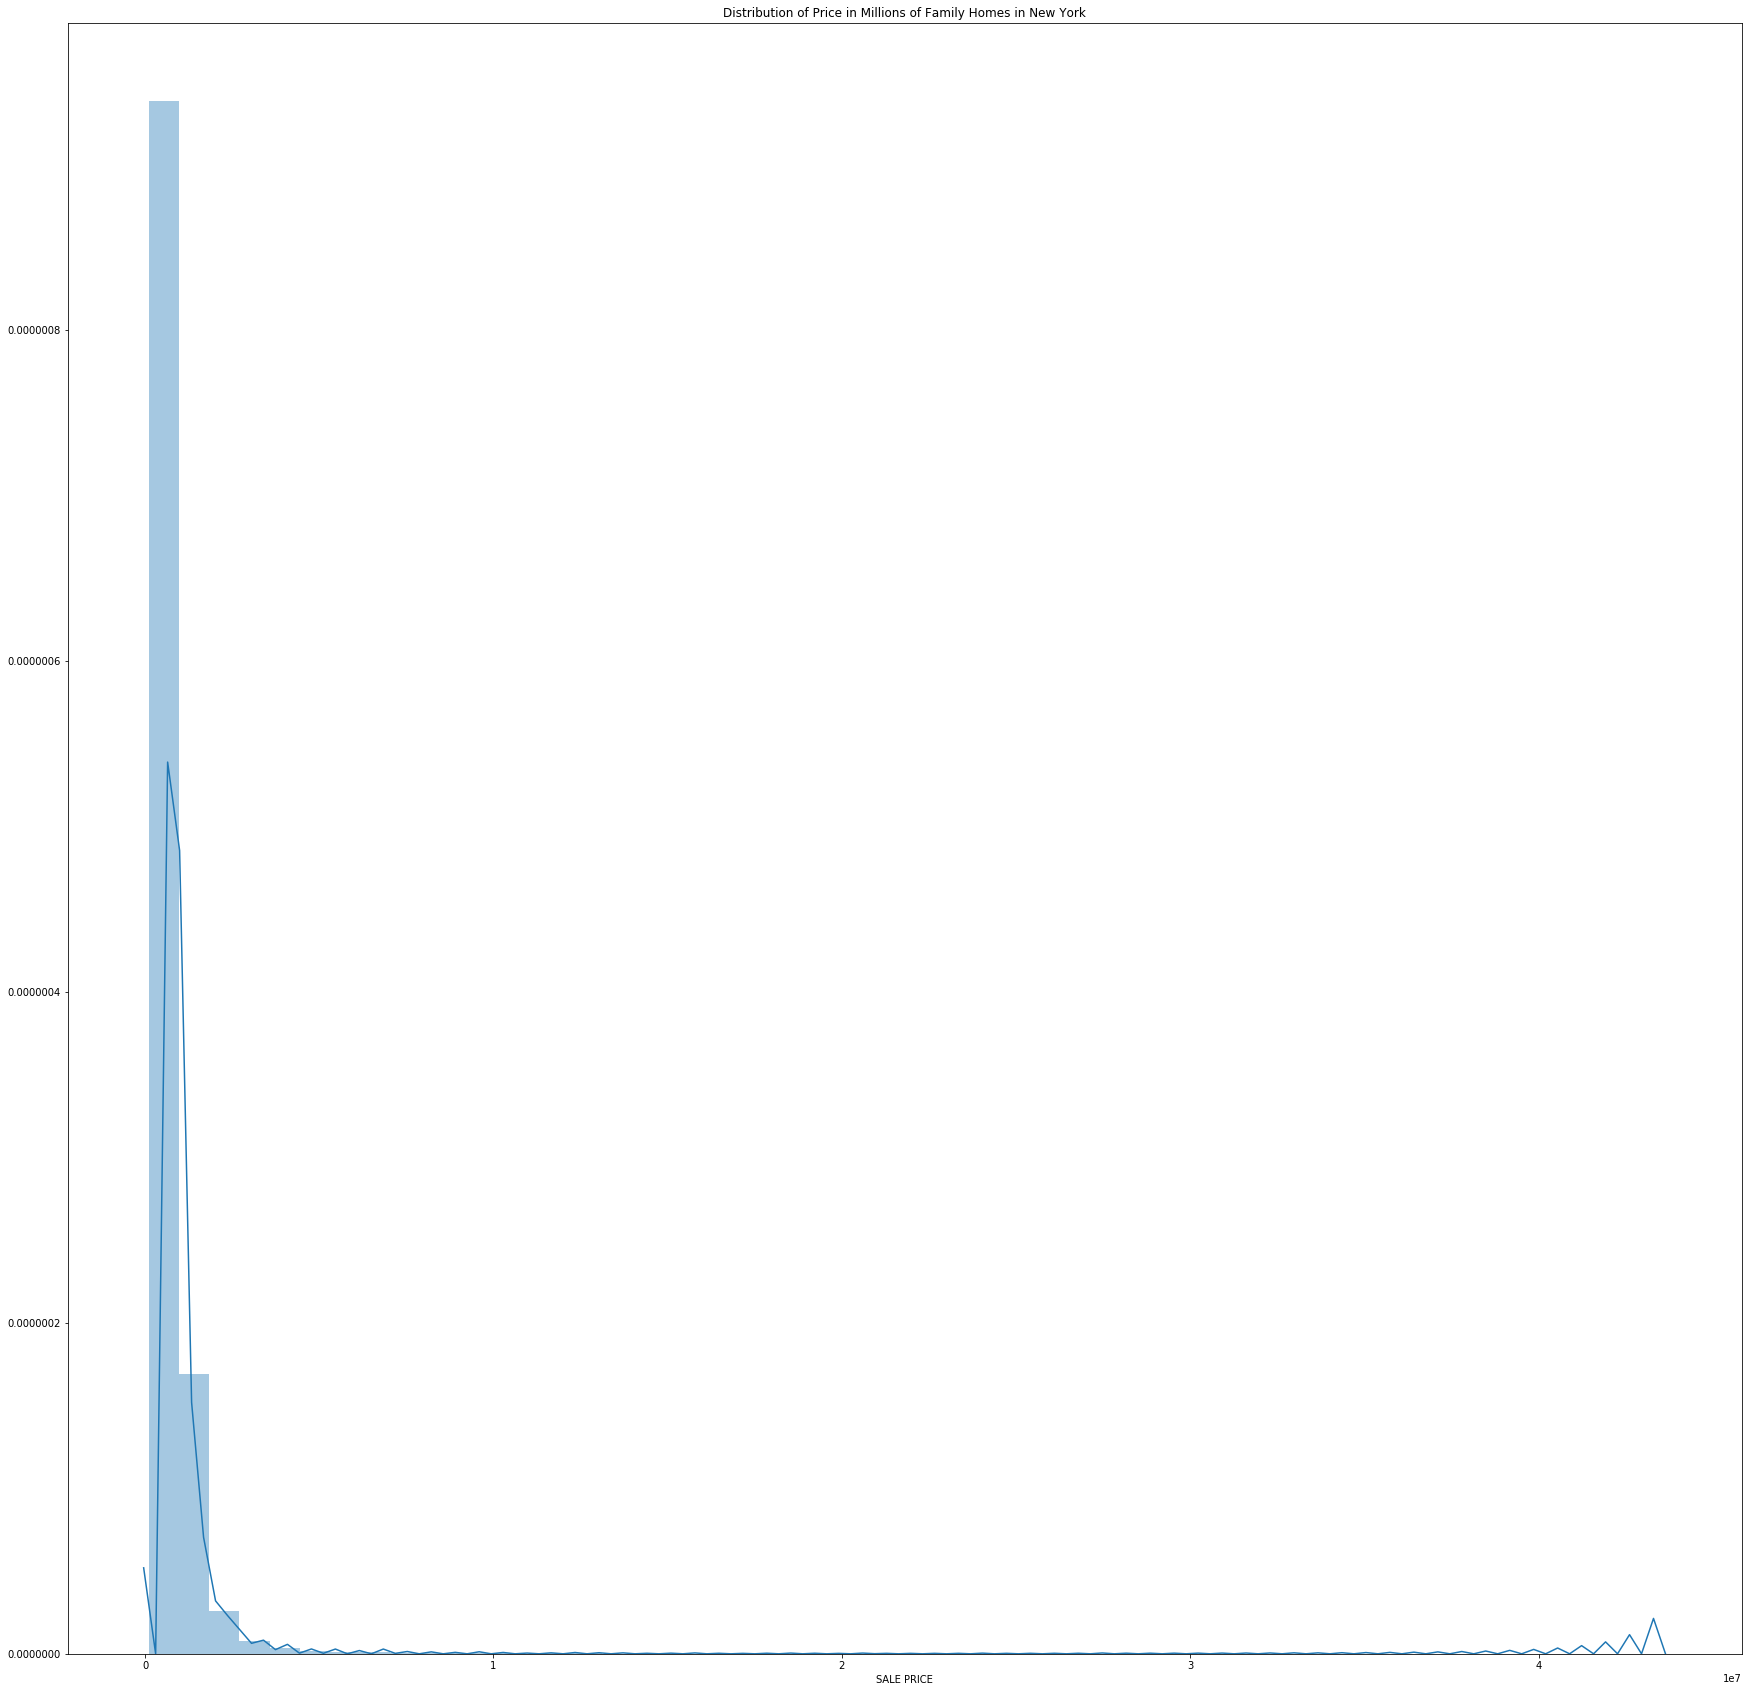

In [163]:
model.evaluate(X_test1,Y_test1)

Y_train1.max()
Y_train1.min()
Y_train1.mean()

plt.figure(figsize=(30,30))
sns.distplot(Y_train1)
plt.title('Distribution of Price in Millions of Family Homes in New York')


In [165]:
#optimizer=keras.optimizers.Adam(lr=0.0001)

model2 = keras.Sequential()
model2.add(Dense(10, input_dim=5, activation='relu' ))
model2.add(Dense(6,activation='relu'))
model2.add(Dense(4,activation='relu'))
model2.add(Dense(1,activation='linear'))

model2.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(lr=.0003),metrics=['mean_absolute_error', 'mean_squared_error'])

In [166]:
#class 2 
#Rental Properties

model2.fit(X_train2,Y_train2, epochs=300, batch_size=20)

Epoch 1/300
5137/5137 [==============================] - 2s 478us/step - loss: 132366284253976.1719 - mean_absolute_error: 2001704.6576 - mean_squared_error: 132366284253976.1719
Epoch 2/300
5137/5137 [==============================] - 1s 164us/step - loss: 132344906325236.1719 - mean_absolute_error: 2001461.8835 - mean_squared_error: 132344906325236.1719
Epoch 3/300
5137/5137 [==============================] - 1s 133us/step - loss: 132326200253633.1719 - mean_absolute_error: 2001220.8431 - mean_squared_error: 132326200253633.1719
Epoch 4/300
5137/5137 [==============================] - 1s 120us/step - loss: 132286490747745.9219 - mean_absolute_error: 2000994.1323 - mean_squared_error: 132286490747745.9219
Epoch 5/300
5137/5137 [==============================] - 1s 114us/step - loss: 132247699260348.8281 - mean_absolute_error: 2000527.9534 - mean_squared_error: 132247699260348.8281
Epoch 6/300
5137/5137 [==============================] - 1s 145us/step - loss: 132215826826986.1250 - mea

5137/5137 [==============================] - 1s 124us/step - loss: 127954438191774.1719 - mean_absolute_error: 1971837.8903 - mean_squared_error: 127954438191774.1719
Epoch 47/300
5137/5137 [==============================] - 1s 122us/step - loss: 127814145738604.8750 - mean_absolute_error: 1970821.7948 - mean_squared_error: 127814145738604.8750
Epoch 48/300
5137/5137 [==============================] - 1s 122us/step - loss: 127668966267044.6562 - mean_absolute_error: 1970010.7472 - mean_squared_error: 127668966267044.6562
Epoch 49/300
5137/5137 [==============================] - 1s 127us/step - loss: 127525358179483.2969 - mean_absolute_error: 1969333.7962 - mean_squared_error: 127525358179483.2969
Epoch 50/300
5137/5137 [==============================] - 1s 121us/step - loss: 127385403720203.0469 - mean_absolute_error: 1968198.2933 - mean_squared_error: 127385403720203.0469
Epoch 51/300
5137/5137 [==============================] - 1s 122us/step - loss: 127243580521210.6562 - mean_absol

5137/5137 [==============================] - 1s 123us/step - loss: 122047636333559.8281 - mean_absolute_error: 1928086.9183 - mean_squared_error: 122047636333559.8281
Epoch 92/300
5137/5137 [==============================] - 1s 125us/step - loss: 121978511657367.8438 - mean_absolute_error: 1926994.9255 - mean_squared_error: 121978511657367.8438
Epoch 93/300
5137/5137 [==============================] - 1s 125us/step - loss: 121805558076485.1719 - mean_absolute_error: 1926106.0032 - mean_squared_error: 121805558076485.1719
Epoch 94/300
5137/5137 [==============================] - 1s 126us/step - loss: 121721430402977.5000 - mean_absolute_error: 1925639.1609 - mean_squared_error: 121721430402977.5000
Epoch 95/300
5137/5137 [==============================] - 1s 134us/step - loss: 121585490472396.2656 - mean_absolute_error: 1924580.5756 - mean_squared_error: 121585490472396.2656
Epoch 96/300
5137/5137 [==============================] - 1s 134us/step - loss: 121466653362708.2344 - mean_absol

5137/5137 [==============================] - 1s 112us/step - loss: 115694565541201.8750 - mean_absolute_error: 1871957.1206 - mean_squared_error: 115694565541201.8750
Epoch 137/300
5137/5137 [==============================] - 1s 159us/step - loss: 115439956144393.5156 - mean_absolute_error: 1870189.2555 - mean_squared_error: 115439956144393.5156
Epoch 138/300
5137/5137 [==============================] - 1s 128us/step - loss: 115208847633179.3750 - mean_absolute_error: 1868076.4047 - mean_squared_error: 115208847633179.3750
Epoch 139/300
5137/5137 [==============================] - 1s 124us/step - loss: 115168350331283.4688 - mean_absolute_error: 1867172.7278 - mean_squared_error: 115168350331283.4688
Epoch 140/300
5137/5137 [==============================] - 1s 125us/step - loss: 115007213620708.1875 - mean_absolute_error: 1866018.2685 - mean_squared_error: 115007213620708.1875
Epoch 141/300
5137/5137 [==============================] - 1s 135us/step - loss: 114786536792164.4531 - mean_

5137/5137 [==============================] - 1s 118us/step - loss: 105981410824532.4688 - mean_absolute_error: 1784863.6488 - mean_squared_error: 105981410824532.4688
Epoch 182/300
5137/5137 [==============================] - 1s 130us/step - loss: 105766351909722.7500 - mean_absolute_error: 1782753.5096 - mean_squared_error: 105766351909722.7500
Epoch 183/300
5137/5137 [==============================] - 1s 124us/step - loss: 105501480141192.2969 - mean_absolute_error: 1779344.1363 - mean_squared_error: 105501480141192.2969
Epoch 184/300
5137/5137 [==============================] - 1s 120us/step - loss: 105244550814278.4688 - mean_absolute_error: 1776863.4482 - mean_squared_error: 105244550814278.4688
Epoch 185/300
5137/5137 [==============================] - 1s 123us/step - loss: 104985532285211.8594 - mean_absolute_error: 1775594.5615 - mean_squared_error: 104985532285211.8594
Epoch 186/300
5137/5137 [==============================] - 1s 122us/step - loss: 104717003516613.2344 - mean_

5137/5137 [==============================] - 1s 117us/step - loss: 93166618845915.9688 - mean_absolute_error: 1655145.5625 - mean_squared_error: 93166618845915.9688
Epoch 227/300
5137/5137 [==============================] - 1s 138us/step - loss: 92833488669960.1250 - mean_absolute_error: 1653155.0118 - mean_squared_error: 92833488669960.1250
Epoch 228/300
5137/5137 [==============================] - 1s 128us/step - loss: 92554220647003.5938 - mean_absolute_error: 1648440.7950 - mean_squared_error: 92554220647003.5938
Epoch 229/300
5137/5137 [==============================] - 1s 130us/step - loss: 92249322998777.0156 - mean_absolute_error: 1644933.7144 - mean_squared_error: 92249322998777.0156
Epoch 230/300
5137/5137 [==============================] - 1s 139us/step - loss: 92031679785490.6406 - mean_absolute_error: 1642981.7894 - mean_squared_error: 92031679785490.6406
Epoch 231/300
5137/5137 [==============================] - 1s 120us/step - loss: 91730953538798.6094 - mean_absolute_er

5137/5137 [==============================] - 1s 139us/step - loss: 82128985135460.0156 - mean_absolute_error: 1518297.4266 - mean_squared_error: 82128985135460.0156
Epoch 272/300
5137/5137 [==============================] - 1s 122us/step - loss: 82021514676140.6719 - mean_absolute_error: 1517073.2847 - mean_squared_error: 82021514676140.6719
Epoch 273/300
5137/5137 [==============================] - 1s 128us/step - loss: 81726511738421.5156 - mean_absolute_error: 1514474.0768 - mean_squared_error: 81726511738421.5156
Epoch 274/300
5137/5137 [==============================] - 1s 122us/step - loss: 81672365220463.5312 - mean_absolute_error: 1511329.1702 - mean_squared_error: 81672365220463.5312
Epoch 275/300
5137/5137 [==============================] - 1s 135us/step - loss: 81513251973309.3750 - mean_absolute_error: 1510340.2395 - mean_squared_error: 81513251973309.3750
Epoch 276/300
5137/5137 [==============================] - 1s 169us/step - loss: 81374744372407.2031 - mean_absolute_er

In [172]:
Y_train2.max()
Y_train2.min()
Y_train2.mean()


model2.evaluate(X_test2,Y_test2)

620000000.0

101000.0

2002316.8436830835

1285/1285 [==============================] - 0s 28us/step


[25144995038726.773, 1399043.5846060312, 25144995038726.773]